In [1]:
import numpy as np
import math
from random import *
import matplotlib.pyplot as plt
import pandas as pd

# Read and convert data to log-return

In [2]:
data48=pd.read_csv('portfolio_returns_48.txt',  delimiter=r"\s+", engine="python" , lineterminator='\r', header=0,skiprows =11)
data48_log=np.log(1+data48/100) # /100 because returns are in bps
data48_log.head(5)
data_factors=pd.read_csv('factors_ff.txt',  delimiter=r"\s+", engine="python" , lineterminator='\r', header=0,skiprows =3)
data_factors_log=np.log(1+data_factors/100)
data_factors_log.head(5)

,Mkt-RF,SMB,HML,RF
196307,-0.004410,-0.004510,-0.011769,0.002696
196308,0.048981,-0.010353,0.017840,0.002497
196309,-0.014708,-0.002102,0.000800,0.002696
196310,0.024497,-0.007025,-0.002002,0.002896
196311,-0.008335,-0.012174,0.016070,0.002696


# Question 2

## (a) Linear Regression

In [3]:
X=data_factors_log.iloc[:,0]-data_factors_log.iloc[:,3] #R_M-rf
one= pd.Series(1, index=X.index.values.tolist())
X1=pd.concat([one, X], axis=1)
n=len(data_factors_log.iloc[:,1]) #number of dates
M=len(data48_log.iloc[1,:]) #number of industry portfolios
Alpha=[]
Beta=[]
MSE=[]
R_sqr=[]
for i in range(0,M):
    Y=data48_log.iloc[:,i]-data_factors_log.iloc[:,3] #R_i-rf
    Reg=np.dot(np.linalg.inv(np.dot(X1.T,X1)),np.dot(X1.T,Y))
    Alpha=Alpha+[Reg[0]]
    Beta=Beta+[Reg[1]]
    error=(np.power(Y-Reg[0]-Reg[1]*X,2)).mean()
    MSE=MSE+[error]
    #computation of R squared:
    SS_res=sum(np.power(Y-Reg[0]-Reg[1]*X,2))
    SS_tot=sum(np.power(Y-Y.mean(),2))
    R_sqr=R_sqr+[1-SS_res/SS_tot]
    print("Portfolio n°",i,"alpha:", Reg[0],"beta: ",Reg[1],"R squared: ",R_sqr[i])

Portfolio n° 0 alpha: 0.00533385225063 beta:  0.929490571639 R squared:  0.410418458164
Portfolio n° 1 alpha: 0.00613790396204 beta:  0.712130329925 R squared:  0.489196317594
Portfolio n° 2 alpha: 0.00790910070906 beta:  0.799236826631 R squared:  0.404180238777
Portfolio n° 3 alpha: 0.00588935876862 beta:  0.763401210412 R squared:  0.43674319914
Portfolio n° 4 alpha: 0.00871898563231 beta:  0.675712651175 R squared:  0.264145830031
Portfolio n° 5 alpha: 0.0059528406951 beta:  1.46550441556 R squared:  0.581769389358
Portfolio n° 6 alpha: 0.00706692211085 beta:  1.29692697879 R squared:  0.593604271867
Portfolio n° 7 alpha: 0.00643068666488 beta:  1.0551062323 R squared:  0.684956048021
Portfolio n° 8 alpha: 0.00570808829281 beta:  0.924694299509 R squared:  0.717967044315
Portfolio n° 9 alpha: 0.00350494710115 beta:  1.11818437239 R squared:  0.578743749325
Portfolio n° 10 alpha: 0.0037988870686 beta:  1.3280339565 R squared:  0.312268910922
Portfolio n° 11 alpha: 0.00805695466814 b

## (b) Study of the pricing errors

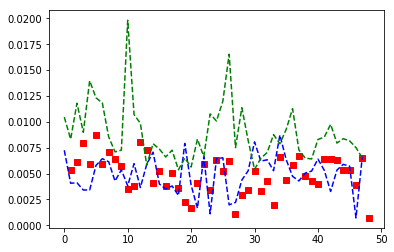

In [4]:
t = np.arange(1, 49, 1)
plt.plot(t, Alpha, 'rs', list(set(Alpha)-set(2*MSE)), 'b--',[Alpha[i] + 2*MSE[i] for i in range(len(Alpha))], 'g--')
plt.show()

In [5]:
print("Alpha mean:", sum(Alpha)/len(Alpha))
print("Alpha stdev:", np.std(Alpha))
print("Average of market excess return:", X.mean())

Alpha mean: 0.00496219001631
Alpha stdev: 0.00177896824393
Average of market excess return: -0.0013570972750870248


## (c) Study of R Squared 

In [6]:
print("R_sqr mean:", np.mean(R_sqr))
print("R_sqr stdev:", np.std(R_sqr))

R_sqr mean: 0.559133027025
R_sqr stdev: 0.143657768063


## (d) Study of Beta 

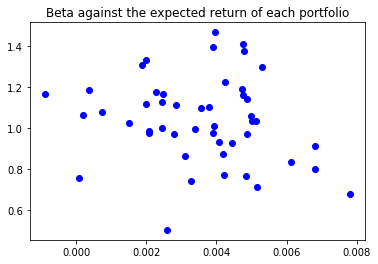

In [7]:
exp_exc_returns=[] # expected excess returns for each security
for i in range(0,M):
    exp_returns=(data48_log.iloc[:,i]-data_factors_log.iloc[:,3]).mean() #R_i-rf
    exp_exc_returns=exp_exc_returns+[exp_returns]
plt.plot(exp_exc_returns, Beta, 'bo')
plt.title("Beta against the expected return of each portfolio")
plt.show()

## (e) "betting against beta" strategy 

## (f) Conclusion on the CAPM

# Question 3

## (a) Multilinear regression (3 factors model) 

In [8]:
frames=[X,data_factors_log.iloc[:,1:3]] 
X3=pd.concat(frames, axis=1) # 3 factors data
one= pd.Series(1, index=X3.index.values.tolist())
Xf=pd.concat([one, X3], axis=1)

Alpha1=[]
Beta1=[]
Beta2=[]
Beta3=[]
MSE=[]
R_sqr=[]
for i in range(0,M):
    Y=data48_log.iloc[:,i]-data_factors_log.iloc[:,3] #R_i-rf
    Reg=np.dot(np.linalg.inv(np.dot(Xf.T,Xf)),np.dot(Xf.T,Y))
    Alpha1=Alpha1+[Reg[0]]
    Beta1=Beta1+[Reg[1]]
    Beta2=Beta2+[Reg[2]]
    Beta3=Beta3+[Reg[3]]
    error=(np.power(Y-Reg[0]-[Reg[1]*a for a in Xf.iloc[:,1]]-[Reg[2]*a for a in Xf.iloc[:,2]]-[Reg[3]*a for a in Xf.iloc[:,3]],2)).mean()
    MSE=MSE+[error]
    #computation of R squared:
    SS_res=sum(np.power(Y-Reg[0]-[Reg[1]*a for a in Xf.iloc[:,1]]-[Reg[2]*a for a in Xf.iloc[:,2]]-[Reg[3]*a for a in Xf.iloc[:,3]],2))
    SS_tot=sum(np.power(Y-Y.mean(),2))
    R_sqr=R_sqr+[1-SS_res/SS_tot]
    print("Portfolio n°",i,"alpha:", Reg[0],"beta1: ",Reg[1],"beta2: ",Reg[2],"beta3: ",Reg[3],"R squared: ",R_sqr[i])

Portfolio n° 0 alpha: 0.00349745459063 beta1:  0.871620744947 beta2:  0.569729150585 beta3:  0.243286347993 R squared:  0.481772055412
Portfolio n° 1 alpha: 0.00534895314638 beta1:  0.837254828302 beta2:  -0.162532210612 beta3:  0.316066655365 R squared:  0.543326330958
Portfolio n° 2 alpha: 0.00811564725711 beta1:  0.891674744548 beta2:  -0.297425893738 beta3:  0.093834129797 R squared:  0.435240987693
Portfolio n° 3 alpha: 0.00492154268792 beta1:  0.851109829505 beta2:  -0.0207415341722 beta3:  0.294940021829 R squared:  0.460709150908
Portfolio n° 4 alpha: 0.00814588105671 beta1:  0.79171321221 beta2:  -0.186249261375 beta3:  0.265008934239 R squared:  0.292586062793
Portfolio n° 5 alpha: 0.00608727624046 beta1:  1.24601750245 beta2:  0.565828414264 beta3:  -0.333357475648 R squared:  0.641374090502
Portfolio n° 6 alpha: 0.0057789287519 beta1:  1.24863711533 beta2:  0.420505242542 beta3:  0.159770833854 R squared:  0.622123089755
Portfolio n° 7 alpha: 0.00523067713804 beta1:  1.0808

## (b) Study of the pricing errors 

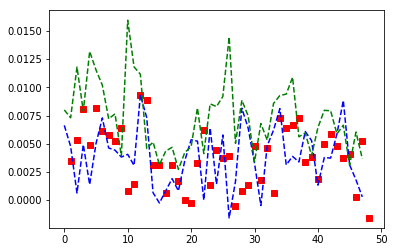

In [9]:
t = np.arange(1, 49, 1)
plt.plot(t, Alpha1, 'rs', list(set(Alpha1)-set(2*MSE)), 'b--',[Alpha1[i] + 2*MSE[i] for i in range(len(Alpha1))], 'g--')
plt.show()

In [10]:
print("CAPM: ")
print("Alpha mean:", np.mean(Alpha), "Alpha stdev:", np.std(Alpha))
print("3 Factors model:")
print("Alpha mean:", np.mean(Alpha1), "Alpha stdev:", np.std(Alpha1))
print("Mean decrease:", 100*(np.mean(Alpha1)/np.mean(Alpha)-1),"%", "Stdev decrease:", 100*(np.std(Alpha1)/np.std(Alpha)-1),"%")

CAPM: 
Alpha mean: 0.00496219001631 Alpha stdev: 0.00177896824393
3 Factors model:
Alpha mean: 0.00387351920955 Alpha stdev: 0.00262444222761
Mean decrease: -21.9393212107 % Stdev decrease: 47.5260863458 %


##  (c) Study of R Squared

In [11]:
print("R_sqr mean:", np.mean(R_sqr))
print("R_sqr stdev:", np.std(R_sqr))

R_sqr mean: 0.611390390375
R_sqr stdev: 0.145665500317


##  (d) Study of Beta

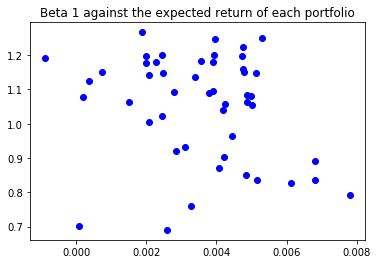

In [12]:
plt.plot(exp_exc_returns, Beta1, 'bo')
plt.title("Beta 1 against the expected return of each portfolio")
plt.show()

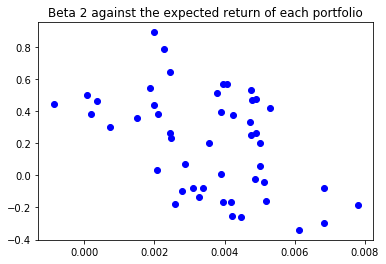

In [15]:
plt.plot(exp_exc_returns, Beta2, 'bo')
plt.title("Beta 2 against the expected return of each portfolio")
plt.show()

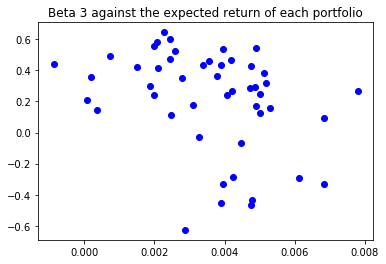

In [14]:
plt.plot(exp_exc_returns, Beta3, 'bo')
plt.title("Beta 3 against the expected return of each portfolio")
plt.show()

## (e) "betting against beta" strategy

## (f) SML and HMB factors 

# Question 4

In [40]:
data2018=pd.read_csv('48_Industry_Portfolios.txt',  delimiter=r"\s+", engine="python" , lineterminator='\r', header=0,skiprows =11)
data2018=data2018.iloc[444:,:] # to begin in 196307 
data_log=np.log(1+data2018/100) # /100 because returns are in bps
data_factors=pd.read_csv('F-F_Research_Data_Factors.txt',  delimiter=r"\s+", engine="python" , lineterminator='\r', header=0,skiprows =3)
data_factors=data_factors.iloc[444:,:] # to begin in 196307 
data_factors_log=np.log(1+data_factors/100)
data_factors_log.head(5)






TypeError: Could not operate 100 with block values unsupported operand type(s) for /: 'str' and 'int'

In [24]:
data2018/100

TypeError: Could not operate 100 with block values unsupported operand type(s) for /: 'str' and 'int'